Recurrent Neural Network (RNN) is where the current state of the input has a dependency on the previous state of the input and so on so forth. For example, if you're to forecast the temperature of today's weather then you're going to decide your results based on historical data.

We can, of course, go with multi-layer perceptron or convolutional neural network approaches but the former will create an overhead of weights by creating too many unnecessary connections and the latter is more suitable for image data. Therefore, a need for a new network is raised which can work on applications which are solely based upon historical data. The RNN is the building block for the forecasting on such sequence data. 

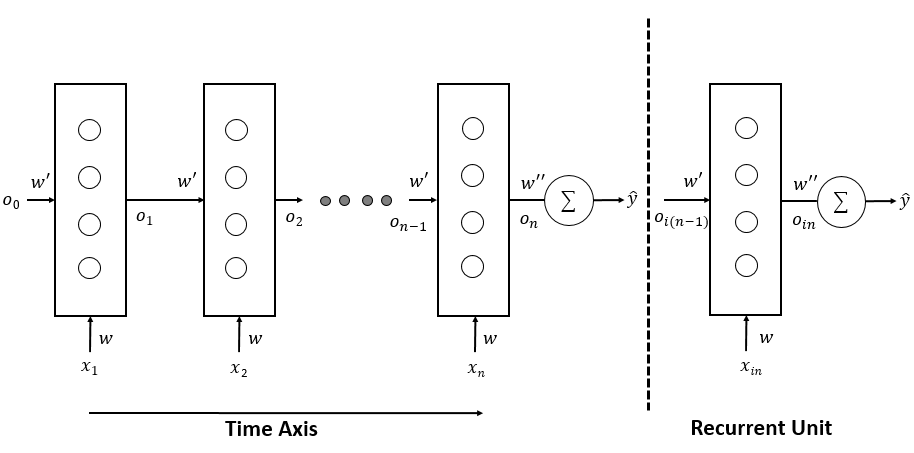

This is a basic architecture of an RNN. To understand it, take a look at the L.H.S. diagram of the dashed line. Assuming you have a time series data with N values gathered over N days. You start by feeding the first value (x1) from your input layer to the hidden layer having r number of nodes. The weights connecting your input layer and the hidden layer is w. When you perform the dot product and have the final output (o1) ready, you feed the new input x2 along with the previous output o1 in the same hidden layer. Do note that only time changes when second input is feed, but hidden layer and weights w and w' remains the same. This process keeps repeating unless you arrive at the final Nth data value. Once you do, then you can apply a final activation function to get the forecasted value y (hat).

If you observe the diagram, the architecture follows a repeating pattern of fetching an input value (xt) and previous output (ot-1) and resulting in a new output (ot). Therefore, if we can just add a random initialized output (o0) before the process begin then the whole network can be represented as a recurrent unit as shown in the R.H.S. of the dashed line.

If we assume that the hidden layer employs an activation function F and final activation function is G, then the forward propagation of given architecture can be inferred from the given equations:

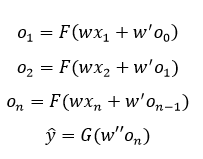

Notice that in each step, the output is dependent upon the current input and last output. For instance, o2 is dependent upon x2 and o1. This time, backpropagation happens over time on the same hidden layer and for n times steps, we will get n gradients for w as well as w'. Later on, we accumulate those gradients and update w and w' for the next review.

Now, the problem is, if the sequence is large enough, then while computing the backpropagation to arrive at the first value, either the gradient becomes too small or it becomes too large for the optimization algorithm to converge. 

To recover the algorithm from the exploding gradient, you can either deploy penalty or follow variants of backpropagation over time like truncated BPTT. To recover from the vanishing gradient you can improve the weight initialization or follow more robust RNN variants like LSTM and GRU 

<b>One to One</b> : This is the architecture which we have seen previously where we have one input and corresponding one output as shown in the block architecture.<br>
<b>One to Many</b>:
In this architecture, you provide input and expect multiple outputs. Generally, such architecture is seen in the process of image captioning where you provide an input image and expect multiple words (output) corresponding to the image.<br>
<b>Many to One</b>:In this architecture, there are multiple inputs mapped to a single output. Consider a case of finding a sentence sentiment (positive/neutral/negative). So, you pass various words (inputs) which need to arrive at a single output (sentiment of the sentence).
For example:
Positive sentiment: The food in this restaurant is very delicious.<br>
Negative sentiment: It is sad to hear the recent earthquake news.<br>
Neutral sentiment: Yes!<br>
<b>Many to Many</b>:Here, you provide multiple inputs and expect multiple outputs from the network. Consider machine translation where you convert a sentence from language A to language B. So, both input and output have multiple entries. <br>



#### Long Short-Term Memory
Recall from the previous basic RNN structure where, at a given timestamp we have only two inputs (xn and on-1) resulting only in one output (on).

As we know that such structures have problems with gradients which can either vanish or explode. To recover from such a situation, researchers presented a new variant to RNN named as Long Short-Term Memory which has an ability to preserve the effects of old inputs in a long sequence as well as keep the effects of new inputs too. To understand this process visually, observe the given figure:

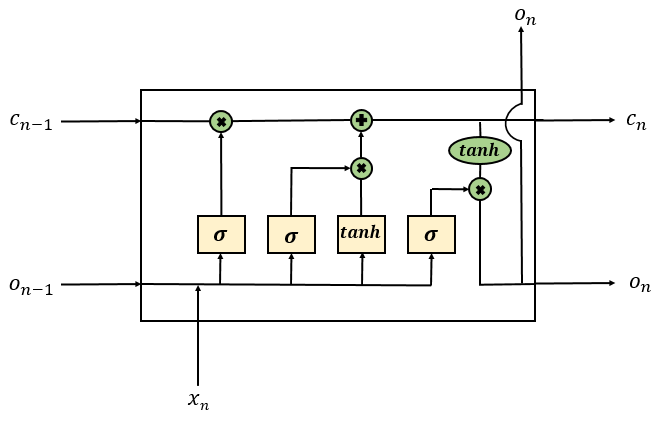

This is an LSTM cell where the yellow units represent the network layer, green units represent the pointwise operation (either multiplication or addition), two arrow lines meeting together represent the concatenation and an arrow line splitting represents copying the values.

As you can observe at a given timestamp, you got three inputs along with two outputs rather than usual two inputs and one output when compared with basic RNN structure. The above LSTM unit is divided into three separate parts Forget gate, Input gate, and Output gate. Let us discuss the usage of each one of them to cover the functioning of whole LSTM cell. To start with, we provide you with the following diagram which has each gate highlighted for your convenience.
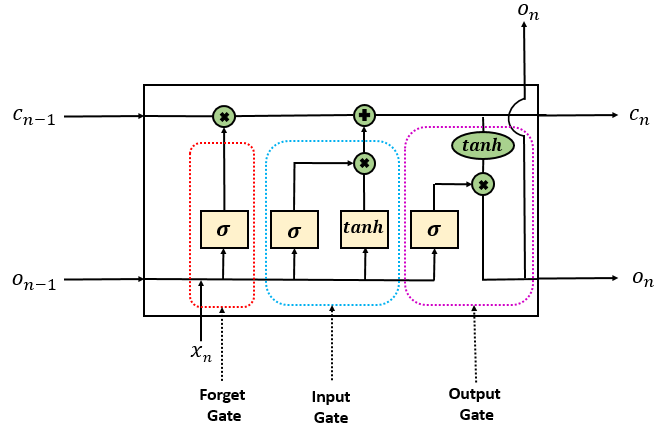

<b>Forget gate</b>

The forget gate (highlighted in the red box) consists of a sigmoid activation layer which helps in taking control of how much previous data needs to be retained and how much of it needs to be expelled. A definite 1 represents keep all the data whereas a definite 0 represents exclude all the data.

Observe that we are not doing any dot product between xn and y (hat) n-1 anywhere. Rather we are performing the concatenation or merging operation. The governed equation of the resulting function can be written as:


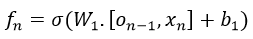
Where W1 represents the combined weights and b1 represents bias. Note, we have used comma in the equation which represents concatenation. The output ft proceeds with the pointwise multiplication operator as seen in the diagram to control the amount of information to be sent ahead.

<b>Input gate</b>

The input gate (highlighted in the blue box) helps to add new information to the final output on by the pointwise multiplication of the following two terms:



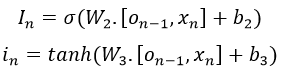

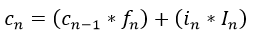

<b>Output gate</b>

Finally, to produce the forecasted output yt, we need the pointwise multiplication of the following two terms inside the output gate (highlighted in the pink box):



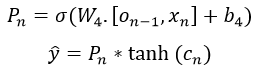

So, this completes a brief introduction of LSTM, their working and how they are efficient than basic RNN architecture. However, there's another variant of LSTM referred to as Gated Recurrent Unit (GRU) which has only two gates, reset gate and update gate (a combination of the forget and input gates). This helps in increasing the performance by reducing the number of gradients to be computed.

#### Bidirectional RNN
In the basic RNN as well as LSTM structures we have observed that apart from a multi-layer perceptron which uses all of the input information, they are constrained to utilize information up to the current timestamp. However, information residing in the future can also play a vital role in predicting the output of a current timestamp layer. For instance, consider a timestamp t with the following information: (t-1, t, t+1):(Kid is hungry). Here, you need to know the information present at time t-1 as well as t+1 to know that the talk is revolving around a kid who is hungry.

To realize this structure, Bidirectional RNN is introduced which uses information both from the past as well as the future from a specific timeframe. The core idea is to split the hidden neurons into forward and backward states and keeping both of them independent from one another. So, the output of forward state is not used as an input to the backward state or vice-versa. A general block architecture is presented below unfolded for three-time steps:

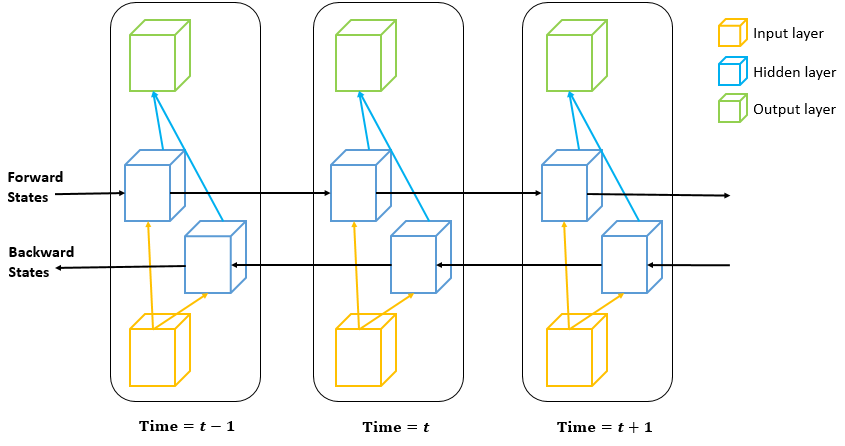

So, for the time state t, information from both t-1 and t+1 can be utilized to achieve the output of the current state. Notice that the number of timestamps to be used to result in the current state output is dependent upon the structure chosen. For an LSTM, it can use information from near as well as far timestamps (both past and future). The training happens similar to a basic RNN as both the states (forward and backward) are independent of one another.

Applications of BRNN include next word prediction, handwriting recognition, speech recognition, etc.